<a href="https://colab.research.google.com/github/CodeHunterOfficial/DL-for-beginers/blob/main/%D0%9A%D0%A0_%D0%90%D1%80%D0%B0%D0%B1%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Линейная регрессия

**Пример**. Прогнозирование цен на недвижимость. Для начала, давайте рассмотрим пример прогнозирования цен на недвижимость на основе данных о количестве комнат, площади дома и расстоянии до ближайшего метро.

In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Создаем датасет
data = {'num_rooms': [2, 3, 1, 2, 3],
        'house_size': [80, 120, 50, 70, 100],
        'distance_to_subway': [0.5, 1.2, 0.8, 1.5, 2.0],
        'price': [150000, 250000, 100000, 130000, 220000]}
df = pd.DataFrame(data)

# Определение независимых и зависимых переменных
X = df[['num_rooms', 'house_size', 'distance_to_subway']]
y = df['price']

# Создание модели линейной регрессии
model = LinearRegression()

# Обучение модели на данных
model.fit(X, y)

# Прогнозирование цены дома на основе его характеристик
new_data = [[3, 120, 1.5], [2, 80, 0.6]]
predicted_prices = model.predict(new_data)
print(predicted_prices)

[259829.54545455 150625.        ]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 1) Создание нового датасета.

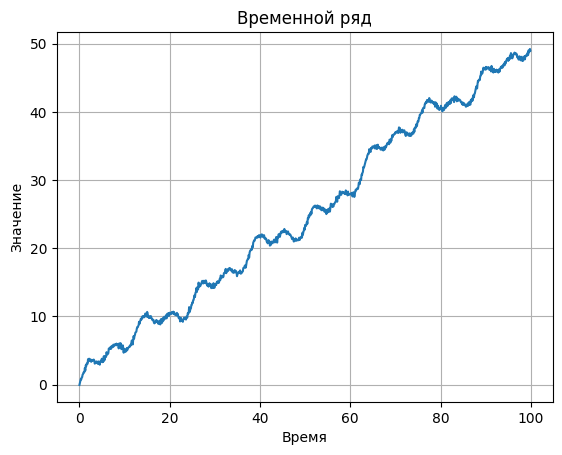

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset_size=100
# Создание временного ряда
t = np.arange(0, dataset_size, 0.1)
y = np.sin(t) + 0.5 * t + np.random.normal(0, 0.2, len(t))

# Добавление сезонности
season = np.sin(t/10) + np.sin(t/5) + np.sin(t/2)
y += season

# Построение графика временного ряда
plt.plot(t, y)
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Временной ряд')
plt.grid(True)
plt.show()

# Разделение на обучающую и тестовую выборки
train_size = int(len(y) * 0.8)
train_data, test_data = y[:train_size], y[train_size:]

# Создание окон для обучения и тестирования
window_size = 10

def create_dataset(data):
    X, y = [], []
    for i in range(len(data)-window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

# Сохранение наборов обучающих и тестовых данных
np.save('train_data.npy', train_data)
np.save('test_data.npy', test_data)


In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

# Загрузка данных
y = np.load('train_data.npy')

# Проверка критерия Дики-Фуллера (ADF)
result_adf = adfuller(y)
print('ADF статистика:', result_adf[0])
print('p-value:', result_adf[1])
print('Критическое значение:', result_adf[4])

# Проверка теста KPSS
result_kpss = kpss(y)
print('\nKPSS статистика:', result_kpss[0])
print('p-value:', result_kpss[1])
print('Критическое значение:', result_kpss[3])


ADF статистика: 0.32481417451916844
p-value: 0.9784547378985915
Критическое значение: {'1%': -3.438783171038672, '5%': -2.865262118650577, '10%': -2.568752018688748}

KPSS статистика: 4.23375284092227
p-value: 0.01
Критическое значение: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-2-93a3731d7bdb>:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(y)


По результатам тестов:

1. Для теста Дики-Фуллера (ADF):
   - ADF статистика: 0.3248
   - p-value: 0.9785
   - Критическое значение: {'1%': -3.4388, '5%': -2.8653, '10%': -2.5688}
   - Вывод: Тест Дики-Фуллера не отвергает нулевую гипотезу о наличии единичного корня, что указывает на нестационарность временного ряда.

2. Для теста KPSS:
   - KPSS статистика: 4.2338
   - p-value: 0.01
   - Критическое значение: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
   - Вывод: Тест KPSS отвергает нулевую гипотезу о стационарности временного ряда.

Исходя из результатов, можно сделать вывод о нестационарности временного ряда на основе обоих тестов.

Данный код выполняет несколько задач, связанных с созданием временного ряда, добавлением сезонности, построением графика временного ряда, разделением на обучающую и тестовую выборки, созданием окон для обучения и тестирования, а также сохранением наборов обучающих и тестовых данных в файлы формата .npy. Давайте разберем каждый шаг подробнее:

1. **Создание временного ряда:**
   - Импортируются библиотеки `numpy`, `pandas` и `matplotlib.pyplot`.
   - Создается временной ряд `t` с шагом 0.1 от 0 до 100.
   - Генерируется временной ряд `y` как сумма синуса от `t`, линейной функции `0.5 * t` и случайного шума с нормальным распределением.
  
2. **Добавление сезонности:**
   - Создается сезонность `season` как сумма нескольких синусоидальных компонентов, зависящих от времени.
   - Сезонность добавляется к исходному временному ряду `y`.

3. **Построение графика временного ряда:**
   - С помощью `matplotlib.pyplot` строится график временного ряда `y` в зависимости от `t`.
   - На графике указываются подписи для осей, заголовок и включается сетка.

4. **Разделение на обучающую и тестовую выборки:**
   - Определяется размер обучающей выборки как 80% от всего временного ряда.
   - Создаются обучающая и тестовая выборки на основе этого разделения.

5. **Создание окон для обучения и тестирования:**
   - Определяется размер окна для создания наборов данных для обучения и тестирования.
   - Функция `create_dataset` создает наборы данных `X` и `y` путем формирования окон из исходных данных.

6. **Сохранение наборов обучающих и тестовых данных:**
   - Наборы обучающих и тестовых данных сохраняются в файлы формата .npy с помощью функции `np.save`.

В результате выполнения этого кода будет создан график временного ряда, а также будут сохранены наборы обучающих и тестовых данных в файлы .npy.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Загрузка обучающего и тестового датасетов
train_data = np.load('train_data.npy')
test_data = np.load('test_data.npy')

# Решейпинг данных
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Создание модели
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(window_size, 1)),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Обучение модели
model.fit(X_train, y_train, epochs=50, batch_size=16)

# Сохранение весов модели
model.save_weights('model_weights.h5')

# Оценка модели на тестовых данных
loss = model.evaluate(X_test, y_test)
print("Потеря на тестовых данных:", loss)

# Прогнозы на тестовых данных
y_pred = model.predict(X_test)

# Вычисление MAE
mae = mean_absolute_error(y_test, y_pred)

# Вычисление MSE
mse = mean_squared_error(y_test, y_pred)

# Вычисление MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Вычисление RMSE
rmse = np.sqrt(mse)

# Вывод результатов
print("MAE:", mae)
print("MSE:", mse)
print("MAPE:", mape)
print("RMSE:", rmse)

# Построение графика временного ряда
plt.plot(t, y)
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Временной ряд')
plt.show()

# Построение графика реальных значений и предсказаний на тестовых данных
y_test_pred = model.predict(X_test)
plt.plot(y_test, label='Реальные значения')
plt.plot(y_test_pred, label='Предсказания')
plt.legend()
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Прогнозы на тестовых данных')
plt.show()

# Построение графика реальных значений и предсказаний на обучающих данных
y_train_pred = model.predict(X_train)
plt.plot(y_train, label='Реальные значения')
plt.plot(y_train_pred, label='Предсказания')
plt.legend()
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Прогнозы на обучающих данных')
plt.show()

Epoch 1/50
50000/50000 [==============================] - 122s 2ms/step - loss: 28309.1562
Epoch 2/50
50000/50000 [==============================] - 122s 2ms/step - loss: 1131.0558
Epoch 3/50
50000/50000 [==============================] - 116s 2ms/step - loss: 864.7989
Epoch 4/50
50000/50000 [==============================] - 112s 2ms/step - loss: 798.2810
Epoch 5/50
50000/50000 [==============================] - 115s 2ms/step - loss: 871.2700
Epoch 6/50
50000/50000 [==============================] - 114s 2ms/step - loss: 809.2141
Epoch 7/50
50000/50000 [==============================] - 114s 2ms/step - loss: 679.3005
Epoch 8/50
50000/50000 [==============================] - 114s 2ms/step - loss: 702.9473
Epoch 9/50
50000/50000 [==============================] - 104s 2ms/step - loss: 557.7576
Epoch 10/50
50000/50000 [==============================] - 104s 2ms/step - loss: 528.4827
Epoch 11/50
50000/50000 [==============================] - 103s 2ms/step - loss: 452.6533
Epoch 12/50
5000

In [ ]:
from keras.utils import plot_model
# Визуализация модели
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
import matplotlib.pyplot as plt

# Загрузка сохраненных весов модели
model.load_weights('model_weights.h5')

# Количество временных шагов для прогнозирования
future_steps = 20

# Подготовка входных данных для прогноза
input_data = test_data[-window_size:]
input_data = input_data.reshape((1, window_size, 1))

# Прогнозирование будущих значений
predictions = []
for _ in range(future_steps):
    prediction = model.predict(input_data)
    prediction = np.squeeze(prediction)
    predictions.append(prediction)
    input_data = np.concatenate((input_data[:, 1:, :], prediction.reshape(1, 1, 1)), axis=1)

# Вывод прогнозируемых значений
print("Прогнозируемые значения:")
print(predictions)

# Построение графика
plt.plot(range(len(test_data)), test_data, label='Оригинальный временной ряд')
plt.plot(range(len(test_data), len(test_data) + future_steps), predictions, label='Прогнозируемые значения')
plt.xlabel('Временные шаги')
plt.ylabel('Значения')
plt.title('Прогноз временного ряда')
plt.legend()
plt.show()


# Линейная регрессия

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

# Загрузка обучающего и тестового датасетов
train_data = np.load('train_data.npy')
test_data = np.load('test_data.npy')

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

# Решейпинг данных
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))

# Создание модели линейной регрессии
model = LinearRegression()

# Обучение модели
model.fit(X_train, y_train)

# Оценка модели на тестовых данных
y_pred = model.predict(X_test)

# Вычисление MAE
mae = mean_absolute_error(y_test, y_pred)

# Вычисление MSE
mse = mean_squared_error(y_test, y_pred)

# Вычисление MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Вычисление RMSE
rmse = np.sqrt(mse)

# Вывод результатов
print("MAE:", mae)
print("MSE:", mse)
print("MAPE:", mape)
print("RMSE:", rmse)

# Построение графика реальных значений и предсказаний на тестовых данных
plt.plot(y_test, label='Реальные значения')
plt.plot(y_pred, label='Предсказания')
plt.legend()
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Прогнозы на тестовом наборе данных')
plt.show()

# Построение графика реальных значений и предсказаний на обучающих данных
y_train_pred = model.predict(X_train)
plt.plot(y_train, label='Реальные значения')
plt.plot(y_train_pred, label='Предсказания')
plt.legend()
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Прогнозы на обучающем наборе данных')
plt.show()
